In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel(r'D:\rakamin_supervisedlearning\Homework\youtube_statistics.xlsx')

In [3]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


### Ubah fitur format waktu ke kategorikal untuk publish_time

In [4]:

def get_hour(time_str):
    try:
        return int(time_str.split(':')[0])
    except Exception:
        return None  

df['publish_hour'] = df['publish_time'].apply(get_hour)

def time_of_day(hour):
    if pd.isnull(hour):
        return 'Unknown'
    elif 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    else:
        return 'Malam'

df['publish_period'] = df['publish_hour'].apply(time_of_day)


In [5]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,publish_hour,publish_period
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,12,Siang
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,5,Pagi
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,15,Siang
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12,7,Pagi
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13,1,Malam


### Ubah fitur publish_date ke kategorikal

In [6]:
# Pastikan kolom publish_date sudah datetime
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Ekstrak hari dalam minggu
df['publish_dayofweek'] = df['publish_date'].dt.dayofweek  # 0=Senin, 6=Minggu

# Kategorikan weekday/weekend
df['is_weekend'] = df['publish_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [7]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,publish_hour,publish_period,publish_dayofweek,is_weekend
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,12,Siang,6,Weekend
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,5,Pagi,0,Weekday
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,15,Siang,6,Weekend
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,False,This video showcases the difference between pe...,20,263,30,2017-11-12,7,Pagi,6,Weekend
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13,1,Malam,0,Weekday


In [8]:
df.isnull().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
publish_hour               0
publish_period             0
publish_dayofweek          0
is_weekend                 0
dtype: int64

### nilai null kolom deskripsi diabaikan karena fitur deskripsi akan di drop

In [9]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,publish_hour,publish_period,publish_dayofweek,is_weekend
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,12,Siang,6,Weekend
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,5,Pagi,0,Weekday
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,15,Siang,6,Weekend
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,False,This video showcases the difference between pe...,20,263,30,2017-11-12,7,Pagi,6,Weekend
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13,1,Malam,0,Weekday


In [10]:
df.duplicated().sum()

np.int64(4229)

In [11]:
# Menampilkan semua baris yang duplikat (selain yang pertama)
dupes = df[df.duplicated(keep=False)]
print(dupes)


      trending_date                                              title  \
1535     2017-11-22  Swag Se Swagat Song | Official Teaser | Salman...   
1536     2017-11-22              Incredibles 2 Official Teaser Trailer   
1537     2017-11-22  Jaisi Karni Waisi Bharni - | Lalit Shokeen Fil...   
1538     2017-11-22  Bomma Adhirindhi Song Trailer | Jawaan Telugu ...   
1539     2017-11-22          Miss World 2017 Top 5 Question and Answer   
...             ...                                                ...   
36786    2018-06-14  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...   
36787    2018-06-14                         Seetha | Flowers | Ep# 364   
36788    2018-06-14  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   
36789    2018-06-14  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...   
36790    2018-06-14  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...   

             channel_title  category_id publish_time  \
1535                   YRF           10     08:40:48   

In [12]:
df = df.drop('trending_date', axis=1)


In [13]:
df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,...,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,publish_hour,publish_period,publish_dayofweek,is_weekend
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,...,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,12,Siang,6,Weekend
1,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,...,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,5,Pagi,0,Weekday
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,...,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,15,Siang,6,Weekend
3,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,...,False,This video showcases the difference between pe...,20,263,30,2017-11-12,7,Pagi,6,Weekend
4,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,...,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13,1,Malam,0,Weekday


In [14]:
# Menampilkan semua baris yang duplikat (selain yang pertama)
dupe2 = df[df.duplicated(keep=False)]
print(dupe2)

                                                   title        channel_title  \
1535   Swag Se Swagat Song | Official Teaser | Salman...                  YRF   
1536               Incredibles 2 Official Teaser Trailer         Disney•Pixar   
1537   Jaisi Karni Waisi Bharni - | Lalit Shokeen Fil...       LShokeen Films   
1538   Bomma Adhirindhi Song Trailer | Jawaan Telugu ...  Arunachal Creations   
1539           Miss World 2017 Top 5 Question and Answer      Beauty Pageants   
...                                                  ...                  ...   
36786  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...       RDC Rajasthani   
36787                         Seetha | Flowers | Ep# 364           Flowers TV   
36788  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...    Mazhavil Manorama   
36789  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...            Tarang TV   
36790  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...   Suresh Productions   

       category_id publish_

In [15]:
dupes_title = df[df.duplicated(subset=['title'], keep=False)]
dupes_count = dupes_title['title'].value_counts()
print(dupes_count.head(10))


title
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                        19
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani                                           16
Nandhini | Today @ 9 pm | Sun TV                                                                    15
Golak Bugni Bank Te Batua Full Movie (HD) | Harish Verma | Simi Chahal | Superhit Punjabi Movies    14
Sanju | Official Trailer | Ranbir Kapoor | Rajkumar Hirani | Releasing on 29th June                 14
Kasthooriman || General Promo || Mon to Sat at 8:30 PM || Asianet                                   14
Garmi Ke Side-Effects | Ashish Chanchlani                                                           13
Restaurant Sutiyapa | Ashish Chanchlani                                                             13
कस्टमर केयर वाली छोरिया | राजस्थानी सुपरहिट कॉमेडी रमकुड़ी झमकूड़ी -9  | Ramkudi Jhamkudi Comedy    13
Tochan (Full Video) | SIDHU MOOSEWALA | BYG BYRD | SONIA MAAN | Hum

### ternyata ada beberapa video yang duplikat jika dilihat dari kolom title, jadi saya akan keep untuk views yang terbesar

In [16]:
df = df.sort_values('views', ascending=False).drop_duplicates(subset=['title'])


In [17]:
print(df.duplicated(subset=['title']).sum())


0


In [18]:
print("Jumlah baris setelah drop duplikat:", len(df))


Jumlah baris setelah drop duplikat: 16431


### karena duplikat sudah bersih waktunya handle missing value

In [19]:
df.isnull().sum()

title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               29
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
publish_hour               0
publish_period             0
publish_dayofweek          0
is_weekend                 0
dtype: int64

### tadi kita sudah temukan "nilai null kolom deskripsi diabaikan karena fitur deskripsi akan di drop" baiklah sekarang kita drop saja

In [20]:
df = df.drop('description', axis=1)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16431 entries, 5300 to 28845
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   16431 non-null  object        
 1   channel_title           16431 non-null  object        
 2   category_id             16431 non-null  int64         
 3   publish_time            16431 non-null  object        
 4   tags                    16431 non-null  object        
 5   views                   16431 non-null  int64         
 6   likes                   16431 non-null  int64         
 7   dislikes                16431 non-null  int64         
 8   comment_count           16431 non-null  int64         
 9   comments_disabled       16431 non-null  bool          
 10  ratings_disabled        16431 non-null  bool          
 11  video_error_or_removed  16431 non-null  bool          
 12  No_tags                 16431 non-null  int64   

In [22]:
df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,publish_hour,publish_period,publish_dayofweek,is_weekend
5300,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912710,1545017,807558,False,False,False,37,710,50,2017-12-06,17,Siang,2,Weekday
4383,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606663,53011,347982,False,False,False,11,448,55,2017-11-29,13,Siang,2,Weekday
28827,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,03:45:03,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",53822757,1250535,44796,135405,False,False,False,24,493,29,2018-04-24,3,Malam,1,Weekday
22545,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,13:02:41,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",45064699,1494997,29812,186005,False,False,False,16,474,57,2018-03-16,13,Siang,4,Weekday
29195,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,24,07:58:08,"Sanju Teaser|""Official Teaser""|""Sanju Official...",44171797,780895,30791,47829,False,False,False,23,1372,57,2018-04-24,7,Pagi,1,Weekday


### karena kita sudah ubah publish_date dan publish_time menjadi fitur numerik maka kita akan buang semua yang sudah tidak penting diantaranya

- publish_date dan publish_time itu sendiri
- publish publish_dayofweek dan publish_hour juga akan kita buang karena itu hanya untuk perhitungan, sebelum merubahnya ke kategorikal (pagi,siang,malam,weekend,weekdays)

#### fitur fitur yang sudah kita putuskan buang di EDA tadi juga akan kita buang sekarang
- *likes*
- *dislikes*
- *comment_count*
- *trending_date*
- *title*
- *description*
- *tags*

#### karena kita sudah buang trending date dan description tadi jadi tinggal sisanya saja

In [23]:
drop_cols = [
    'publish_date',
    'publish_time',
    'publish_dayofweek',
    'publish_hour',
    'likes',
    'dislikes',
    'comment_count',
    'title',
    'tags'
]

df = df.drop(columns=drop_cols)


In [24]:
df.head()

,channel_title,category_id,views,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_period,is_weekend
5300,YouTube Spotlight,24,125432237,False,False,False,37,710,50,Siang,Weekday
4383,Marvel Entertainment,24,89930713,False,False,False,11,448,55,Siang,Weekday
28827,Sony Pictures Entertainment,24,53822757,False,False,False,24,493,29,Malam,Weekday
22545,Marvel Entertainment,24,45064699,False,False,False,16,474,57,Siang,Weekday
29195,FoxStarHindi,24,44171797,False,False,False,23,1372,57,Pagi,Weekday


### setelah saya pikirkan matang matang video error or removed ini juga kurang relevan untuk saat ini, tapi dimasa depan mungkin terutama jika pipeline sudah jadi dan datanya masuk terus menerus

In [25]:
df = df.drop('video_error_or_removed', axis=1)

In [26]:
df.head()

,channel_title,category_id,views,comments_disabled,ratings_disabled,No_tags,desc_len,len_title,publish_period,is_weekend
5300,YouTube Spotlight,24,125432237,False,False,37,710,50,Siang,Weekday
4383,Marvel Entertainment,24,89930713,False,False,11,448,55,Siang,Weekday
28827,Sony Pictures Entertainment,24,53822757,False,False,24,493,29,Malam,Weekday
22545,Marvel Entertainment,24,45064699,False,False,16,474,57,Siang,Weekday
29195,FoxStarHindi,24,44171797,False,False,23,1372,57,Pagi,Weekday


### walaupun sudah saya lakukan EDA untuk channel_title dan menemukan beberapa channel memang memiliki jumlah views yang konsisten, tapi akan saya cek lagi jika jumlah nilai uniquenya terlalu banyak mungkin saya harus pertimbangkan untuk drop

In [27]:
print(df['channel_title'].nunique())

1388


wah ternyata banyak 1388, dan tidak akan mungkin melakukan one hot encoding (jika maksa maka ada tambahan 1388 fitur wwkwk)

jika kita lakukan binning berdasarkan jumlah subscriber akan lebih masuk akal, tapi kita tidak punya fitur jumlah subscriber. kalau berdasarkan views maka akan menyebabkan data leakage karena secara tidak langsung memberi jawaban ke model jika kita lakukan binning berdasarkan rata rata jumlah views

### Jadi kita drop channel_title juga

In [28]:
df = df.drop('channel_title', axis=1)


In [29]:
df.head()

,category_id,views,comments_disabled,ratings_disabled,No_tags,desc_len,len_title,publish_period,is_weekend
5300,24,125432237,False,False,37,710,50,Siang,Weekday
4383,24,89930713,False,False,11,448,55,Siang,Weekday
28827,24,53822757,False,False,24,493,29,Malam,Weekday
22545,24,45064699,False,False,16,474,57,Siang,Weekday
29195,24,44171797,False,False,23,1372,57,Pagi,Weekday


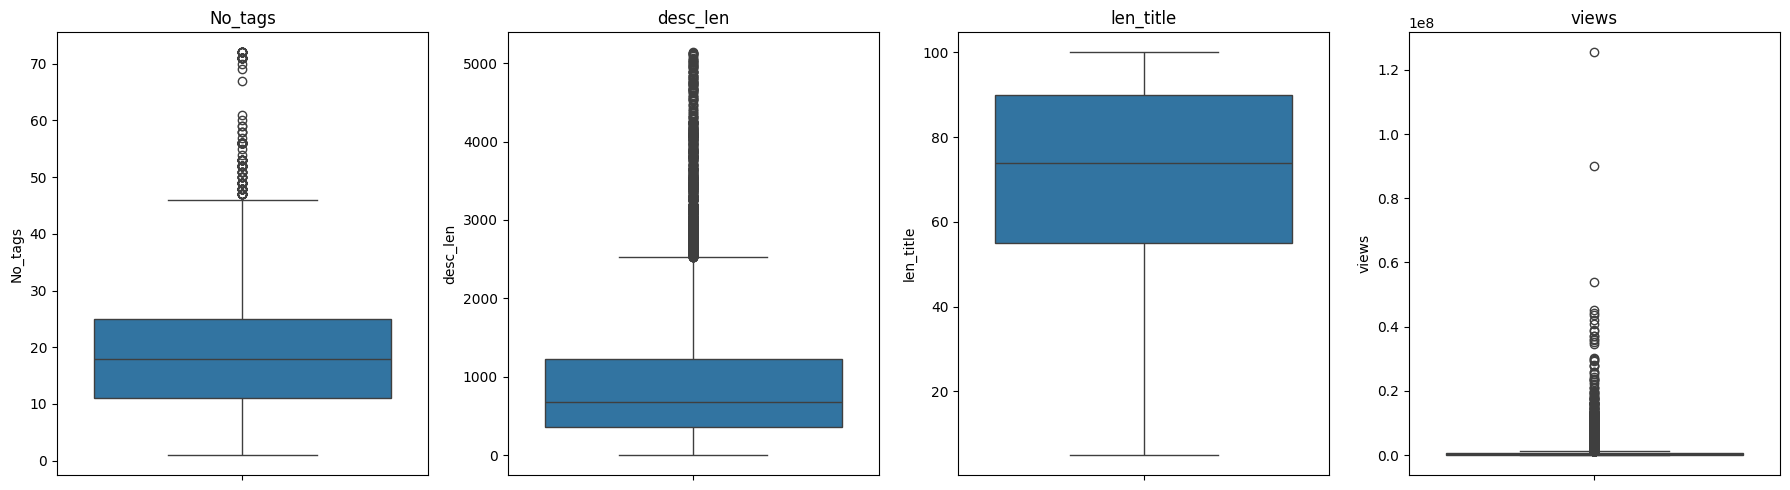

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# List kolom numerik
numerical_features = ['No_tags', 'desc_len', 'len_title', 'views']

# Subplot boxplot biar rapi
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
plt.tight_layout()
plt.show()


In [33]:


# Pisahkan X (fitur) dan y (target)
X = df.drop('views', axis=1)
y = df['views']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test :", y_test.shape)


Shape X_train: (13144, 8)
Shape X_test : (3287, 8)
Shape y_train: (13144,)
Shape y_test : (3287,)


In [34]:
#print isi X_train
print(X_train.head())

       category_id  comments_disabled  ratings_disabled  No_tags  desc_len  \
9065            10              False             False        6      1163   
13109           24              False             False       23       117   
13700           24              False             False        9       879   
21935           24              False             False       10      1512   
5083            28              False             False       35      1046   

       len_title publish_period is_weekend  
9065          65          Siang    Weekday  
13109         63          Malam    Weekday  
13700         72           Pagi    Weekday  
21935         52          Malam    Weekday  
5083          27           Pagi    Weekend  


In [36]:
#print isi y_train
print(y_train.head())

9065     290941
13109    250620
13700    763700
21935    119890
5083     252827
Name: views, dtype: int64


In [37]:
#print isi X_test
print(X_test.head())

       category_id  comments_disabled  ratings_disabled  No_tags  desc_len  \
15470           10              False             False        9       544   
25496           25               True             False       15       845   
31484           22              False             False       20       331   
2639            26              False             False       16       847   
26597           23              False             False       17       641   

       len_title publish_period is_weekend  
15470         86          Malam    Weekday  
25496         67          Siang    Weekday  
31484         29          Malam    Weekend  
2639          90           Pagi    Weekday  
26597         81           Pagi    Weekday  


In [38]:
#print isi y_test
print(y_test.head())

15470    281520
25496    415293
31484    153785
2639     223167
26597     49777
Name: views, dtype: int64


In [39]:
# Log-transform di train & test (fit pakai train, apply ke test)
for col in ['No_tags', 'desc_len']:
    X_train[col + '_log'] = np.log1p(X_train[col])
    X_test[col + '_log'] = np.log1p(X_test[col])


In [40]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


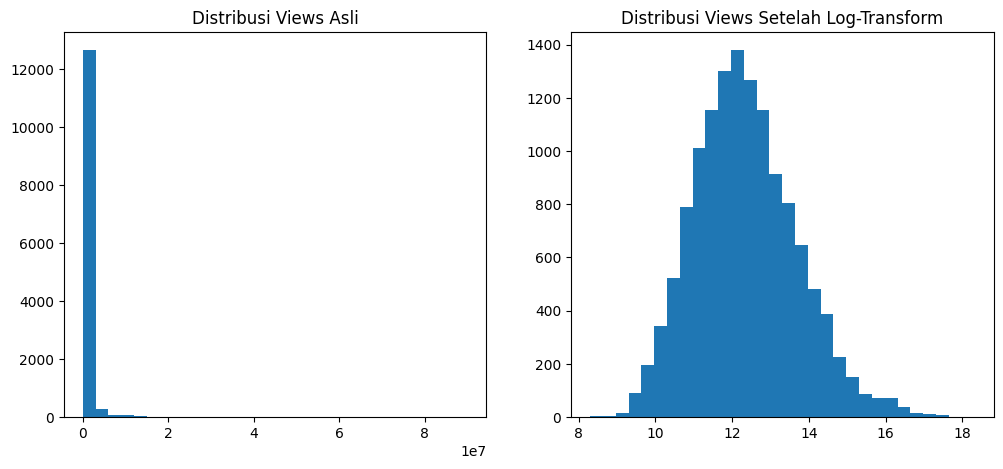

In [41]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30)
plt.title('Distribusi Views Asli')
plt.subplot(1, 2, 2)
plt.hist(y_train_log, bins=30)
plt.title('Distribusi Views Setelah Log-Transform')
plt.show()


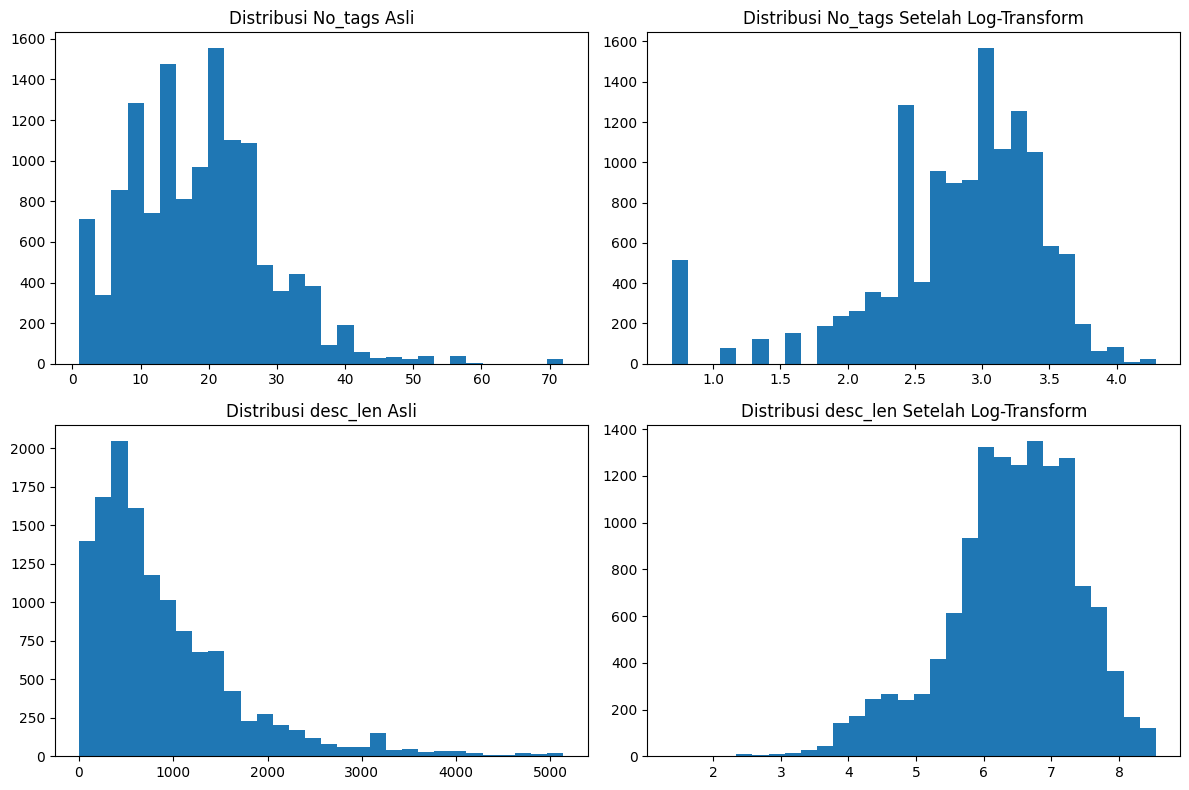

In [43]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# No_tags asli
axes[0, 0].hist(X_train['No_tags'], bins=30)
axes[0, 0].set_title('Distribusi No_tags Asli')

# No_tags log
axes[0, 1].hist(X_train['No_tags_log'], bins=30)
axes[0, 1].set_title('Distribusi No_tags Setelah Log-Transform')

# desc_len asli
axes[1, 0].hist(X_train['desc_len'], bins=30)
axes[1, 0].set_title('Distribusi desc_len Asli')

# desc_len log
axes[1, 1].hist(X_train['desc_len_log'], bins=30)
axes[1, 1].set_title('Distribusi desc_len Setelah Log-Transform')

plt.tight_layout()
plt.show()


In [44]:
#print x_train 
print(X_train.head())

       category_id  comments_disabled  ratings_disabled  No_tags  desc_len  \
9065            10              False             False        6      1163   
13109           24              False             False       23       117   
13700           24              False             False        9       879   
21935           24              False             False       10      1512   
5083            28              False             False       35      1046   

       len_title publish_period is_weekend  No_tags_log  desc_len_log  
9065          65          Siang    Weekday     1.945910      7.059618  
13109         63          Malam    Weekday     3.178054      4.770685  
13700         72           Pagi    Weekday     2.302585      6.779922  
21935         52          Malam    Weekday     2.397895      7.321850  
5083          27           Pagi    Weekend     3.583519      6.953684  


In [45]:
#print x_test
print(X_test.head())

       category_id  comments_disabled  ratings_disabled  No_tags  desc_len  \
15470           10              False             False        9       544   
25496           25               True             False       15       845   
31484           22              False             False       20       331   
2639            26              False             False       16       847   
26597           23              False             False       17       641   

       len_title publish_period is_weekend  No_tags_log  desc_len_log  
15470         86          Malam    Weekday     2.302585      6.300786  
25496         67          Siang    Weekday     2.772589      6.740519  
31484         29          Malam    Weekend     3.044522      5.805135  
2639          90           Pagi    Weekday     2.833213      6.742881  
26597         81           Pagi    Weekday     2.890372      6.464588  


In [47]:
#print y_train_log
print(y_train_log.head())

9065     12.580879
13109    12.431697
13700    13.545932
21935    11.694338
5083     12.440465
Name: views, dtype: float64


In [48]:
#print y_test_log
print(y_test_log.head())

15470    12.547962
25496    12.936742
31484    11.943317
2639     12.315680
26597    10.815328
Name: views, dtype: float64


### Disini kita pakai log1p

np.log1p(x) = log(1 + x)

(aman buat data dengan nilai 0)

### dan expm1 untuk mengembalikan nilainya ke skala asli

np.expm1(y) = exp(y) - 1

(kebalikan dari log1p, hasilnya balik ke skala asli)



In [49]:
# describe x train
print(X_train.describe())

        category_id       No_tags      desc_len     len_title   No_tags_log  \
count  13144.000000  13144.000000  13144.000000  13144.000000  13144.000000   
mean      22.357045     18.664562    909.189136     70.920116      2.805351   
std        5.961155     10.156749    805.345579     21.645305      0.667804   
min        1.000000      1.000000      3.000000      5.000000      0.693147   
25%       23.000000     11.000000    363.000000     55.000000      2.484907   
50%       24.000000     18.000000    670.000000     74.000000      2.944439   
75%       25.000000     25.000000   1231.000000     90.000000      3.258097   
max       43.000000     72.000000   5136.000000    100.000000      4.290459   

       desc_len_log  
count  13144.000000  
mean       6.418569  
std        0.974202  
min        1.386294  
25%        5.897154  
50%        6.508769  
75%        7.116394  
max        8.544225  


In [50]:
# OneHot encode category_id
X_train = pd.get_dummies(X_train, columns=['category_id'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['category_id'], drop_first=True)

# Sinkronisasi kolom (handle kasus ada kategori yang cuma muncul di train/test)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [51]:
# print isi X_train setelah one-hot encoding
print(X_train.head())

       comments_disabled  ratings_disabled  No_tags  desc_len  len_title  \
9065               False             False        6      1163         65   
13109              False             False       23       117         63   
13700              False             False        9       879         72   
21935              False             False       10      1512         52   
5083               False             False       35      1046         27   

      publish_period is_weekend  No_tags_log  desc_len_log  category_id_2  \
9065           Siang    Weekday     1.945910      7.059618          False   
13109          Malam    Weekday     3.178054      4.770685          False   
13700           Pagi    Weekday     2.302585      6.779922          False   
21935          Malam    Weekday     2.397895      7.321850          False   
5083            Pagi    Weekend     3.583519      6.953684          False   

       ...  category_id_22  category_id_23  category_id_24  category_id_25  \
90

In [52]:
# print isi X_test setelah one-hot encoding
print(X_test.head())

       comments_disabled  ratings_disabled  No_tags  desc_len  len_title  \
15470              False             False        9       544         86   
25496               True             False       15       845         67   
31484              False             False       20       331         29   
2639               False             False       16       847         90   
26597              False             False       17       641         81   

      publish_period is_weekend  No_tags_log  desc_len_log  category_id_2  \
15470          Malam    Weekday     2.302585      6.300786          False   
25496          Siang    Weekday     2.772589      6.740519          False   
31484          Malam    Weekend     3.044522      5.805135          False   
2639            Pagi    Weekday     2.833213      6.742881          False   
26597           Pagi    Weekday     2.890372      6.464588          False   

       ...  category_id_22  category_id_23  category_id_24  category_id_25  \
15

In [53]:
#print shape X_train setelah one-hot encoding
print("Shape X_train after One-Hot Encoding:", X_train.shape)

Shape X_train after One-Hot Encoding: (13144, 25)


In [55]:
#print shape X_test setelah one-hot encoding
print("Shape X_test after One-Hot Encoding:", X_test.shape)

Shape X_test after One-Hot Encoding: (3287, 25)


### encoding nilai true false di comment_disabled, rating_disabled

In [56]:
for col in ['comments_disabled', 'ratings_disabled']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

### encoding nilai isweekend , 1 = weekend 0 = weekdays

In [58]:
X_train['is_weekend'] = X_train['is_weekend'].map({'Weekday': 0, 'Weekend': 1})
X_test['is_weekend'] = X_test['is_weekend'].map({'Weekday': 0, 'Weekend': 1})

terakhir one hot encoding untuk pagi, siang , malam karena tidak ada urutan logis

In [59]:
X_train = pd.get_dummies(X_train, columns=['publish_period'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['publish_period'], drop_first=True)

# Sinkronisasi kolom agar X_test punya kolom yang sama seperti X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [60]:
#print isi X_train setelah preprocessing
print(X_train.head())

       comments_disabled  ratings_disabled  No_tags  desc_len  len_title  \
9065                   0                 0        6      1163         65   
13109                  0                 0       23       117         63   
13700                  0                 0        9       879         72   
21935                  0                 0       10      1512         52   
5083                   0                 0       35      1046         27   

       is_weekend  No_tags_log  desc_len_log  category_id_2  category_id_10  \
9065            0     1.945910      7.059618          False            True   
13109           0     3.178054      4.770685          False           False   
13700           0     2.302585      6.779922          False           False   
21935           0     2.397895      7.321850          False           False   
5083            1     3.583519      6.953684          False           False   

       ...  category_id_24  category_id_25  category_id_26  category

In [61]:
# print isi kolom comment_disabled, rating_disabled, is_weekend pada X_train
print(X_train[['comments_disabled', 'ratings_disabled', 'is_weekend']].head())

       comments_disabled  ratings_disabled  is_weekend
9065                   0                 0           0
13109                  0                 0           0
13700                  0                 0           0
21935                  0                 0           0
5083                   0                 0           1


In [64]:
# print isi kolom publish_period pada X_train
X_train.columns[X_train.columns.str.startswith('publish_period_')].to_list()

['publish_period_Pagi', 'publish_period_Siang']

In [65]:
print((X_train[['publish_period_Pagi', 'publish_period_Siang']] == 0).all(axis=1).sum())


3403


In [66]:
# Ubah semua kolom bertipe bool menjadi int di X_train dan X_test
for df in [X_train, X_test]:
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)


In [67]:
#print x_train setelah mengubah bool ke int
print(X_train.head())

       comments_disabled  ratings_disabled  No_tags  desc_len  len_title  \
9065                   0                 0        6      1163         65   
13109                  0                 0       23       117         63   
13700                  0                 0        9       879         72   
21935                  0                 0       10      1512         52   
5083                   0                 0       35      1046         27   

       is_weekend  No_tags_log  desc_len_log  category_id_2  category_id_10  \
9065            0     1.945910      7.059618              0               1   
13109           0     3.178054      4.770685              0               0   
13700           0     2.302585      6.779922              0               0   
21935           0     2.397895      7.321850              0               0   
5083            1     3.583519      6.953684              0               0   

       ...  category_id_24  category_id_25  category_id_26  category

# encoding sudah dilakukan. dan ini hasilnya

In [68]:
print(X_train.head().T)

                            9065        13109       13700        21935  \
comments_disabled        0.000000    0.000000    0.000000     0.000000   
ratings_disabled         0.000000    0.000000    0.000000     0.000000   
No_tags                  6.000000   23.000000    9.000000    10.000000   
desc_len              1163.000000  117.000000  879.000000  1512.000000   
len_title               65.000000   63.000000   72.000000    52.000000   
is_weekend               0.000000    0.000000    0.000000     0.000000   
No_tags_log              1.945910    3.178054    2.302585     2.397895   
desc_len_log             7.059618    4.770685    6.779922     7.321850   
category_id_2            0.000000    0.000000    0.000000     0.000000   
category_id_10           1.000000    0.000000    0.000000     0.000000   
category_id_15           0.000000    0.000000    0.000000     0.000000   
category_id_17           0.000000    0.000000    0.000000     0.000000   
category_id_19           0.000000    0

In [69]:
# List semua kolom yang mengandung 'category_'
category_cols = [col for col in X_train.columns if col.startswith('category_id_')]

# Print jumlah dan nama kolom
print(f"Total kolom category_id hasil one-hot: {len(category_cols)}")
print(category_cols)

# Tampilkan 5 baris pertama dari kolom-kolom category_id
print(X_train[category_cols].head())


Total kolom category_id hasil one-hot: 16
['category_id_2', 'category_id_10', 'category_id_15', 'category_id_17', 'category_id_19', 'category_id_20', 'category_id_22', 'category_id_23', 'category_id_24', 'category_id_25', 'category_id_26', 'category_id_27', 'category_id_28', 'category_id_29', 'category_id_30', 'category_id_43']
       category_id_2  category_id_10  category_id_15  category_id_17  \
9065               0               1               0               0   
13109              0               0               0               0   
13700              0               0               0               0   
21935              0               0               0               0   
5083               0               0               0               0   

       category_id_19  category_id_20  category_id_22  category_id_23  \
9065                0               0               0               0   
13109               0               0               0               0   
13700             

### Setelah saya cek sekitar 10 kali saya sudah pastikan bahwa hasil encoding ini benar baik pada fitur category_id yang memiliki nilai 1-43 tapi kenyataannya hanya ada 17 kategori yang ditemukan dan ini kita hitung berapa jumlah fiturnya

In [70]:
# hitung jumlah semua kolom yang ada di X_train
total_columns = len(X_train.columns)
print(f"Total kolom di X_train setelah preprocessing: {total_columns}")

Total kolom di X_train setelah preprocessing: 26


## TOTAL FITUR YANG ADA SAAT INI 26, `FITUR ORIGINAL MASIH DIDALAMNYA SEHINGGA HABIS INI AKAN KITA DROP LAGI`